In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 199 kB 46.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=6e0e79a15a49a4b065608a88e52fce91c882b3e6bfac2835816992636db7e0fd
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  # Untuk visualisasi
import seaborn as sns                 # Untuk visualisasi
plt.style.use("seaborn")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/Magister Informatika/Big Data Analysis/Tugas Clustering/ObesityDataSet_raw_and_data_sinthetic.csv", header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- family_history_with_overweight: string (nullable = true)
 |-- FAVC: string (nullable = true)
 |-- FCVC: double (nullable = true)
 |-- NCP: double (nullable = true)
 |-- CAEC: string (nullable = true)
 |-- SMOKE: string (nullable = true)
 |-- CH2O: double (nullable = true)
 |-- SCC: string (nullable = true)
 |-- FAF: double (nullable = true)
 |-- TUE: double (nullable = true)
 |-- CALC: string (nullable = true)
 |-- MTRANS: string (nullable = true)
 |-- NObeyesdad: string (nullable = true)



In [ ]:
df.show(4,False)

+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+---------------------+------------------+
|Gender|Age |Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|CAEC     |SMOKE|CH2O|SCC|FAF|TUE|CALC      |MTRANS               |NObeyesdad        |
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+---------------------+------------------+
|Female|21.0|1.62  |64.0  |yes                           |no  |2.0 |3.0|Sometimes|no   |2.0 |no |0.0|1.0|no        |Public_Transportation|Normal_Weight     |
|Female|21.0|1.52  |56.0  |yes                           |no  |3.0 |3.0|Sometimes|yes  |3.0 |yes|3.0|0.0|Sometimes |Public_Transportation|Normal_Weight     |
|Male  |23.0|1.8   |77.0  |yes                           |no  |2.0 |3.0|Sometimes|no   |2.0 |no |2.0|1.0|Frequently|Public_Transportation|Normal_Weight     |
|Male  |27.0|1.8   |87.0  |no                       

In [ ]:
df.count()

2111

In [ ]:
# import packages
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# conversion
indexer_family = StringIndexer(inputCol='family_history_with_overweight', outputCol='family_history_with_overweight_numeric').fit(df)
indexed_df_family = indexer_family.transform(df)
indexed_df_family_1  = indexed_df_family.drop('family_history_with_overweight')

indexer_FAVC = StringIndexer(inputCol='FAVC', outputCol='FAVC_numeric').fit(indexed_df_family_1)
indexed_df_FAVC = indexer_FAVC.transform(indexed_df_family_1)
indexed_df_FAVC_1  = indexed_df_FAVC.drop('FAVC')

indexer_CAEC = StringIndexer(inputCol='CAEC', outputCol='CAEC_numeric').fit(indexed_df_FAVC_1)
indexed_df_CAEC = indexer_CAEC.transform(indexed_df_FAVC_1)
indexed_df_CAEC_1  = indexed_df_CAEC.drop('CAEC')

indexer_MTRANS = StringIndexer(inputCol='MTRANS', outputCol='MTRANS_numeric').fit(indexed_df_CAEC_1)
indexed_df_MTRANS = indexer_MTRANS.transform(indexed_df_CAEC_1)
indexed_df_MTRANS_1  = indexed_df_MTRANS.drop('MTRANS')

indexer_SCC = StringIndexer(inputCol='SCC', outputCol='SCC_numeric').fit(indexed_df_MTRANS_1)
indexed_df_SCC = indexer_SCC.transform(indexed_df_MTRANS_1)
indexed_df_SCC_1  = indexed_df_SCC.drop('SCC')

indexer_CALC = StringIndexer(inputCol='CALC', outputCol='CALC_numeric').fit(indexed_df_SCC_1)
indexed_df_CALC = indexer_CALC.transform(indexed_df_SCC_1)
indexed_df_CALC_1 = indexed_df_CALC.drop('CALC')

indexer_SMOKE = StringIndexer(inputCol='SMOKE', outputCol='SMOKE_numeric').fit(indexed_df_CALC_1)
indexed_df_SMOKE = indexer_SMOKE.transform(indexed_df_CALC_1)
indexed_df_SMOKE_1 = indexed_df_SMOKE.drop('SMOKE')

indexer_NObeyesdad = StringIndexer(inputCol='NObeyesdad', outputCol='NObeyesdad_numeric').fit(indexed_df_SMOKE_1)
indexed_df_NObeyesdad = indexer_NObeyesdad.transform(indexed_df_SMOKE_1)
indexed_df_NObeyesdad_1 = indexed_df_NObeyesdad.drop('NObeyesdad')

indexer_Gender = StringIndexer(inputCol='Gender', outputCol='Gender_numeric').fit(indexed_df_NObeyesdad_1)
indexed_df_Gender = indexer_Gender.transform(indexed_df_NObeyesdad_1)
indexed_df_fix = indexed_df_Gender.drop('Gender')

indexed_df_fix.show(2, False)

+----+------+------+----+---+----+---+---+--------------------------------------+------------+------------+--------------+-----------+------------+-------------+------------------+--------------+
|Age |Height|Weight|FCVC|NCP|CH2O|FAF|TUE|family_history_with_overweight_numeric|FAVC_numeric|CAEC_numeric|MTRANS_numeric|SCC_numeric|CALC_numeric|SMOKE_numeric|NObeyesdad_numeric|Gender_numeric|
+----+------+------+----+---+----+---+---+--------------------------------------+------------+------------+--------------+-----------+------------+-------------+------------------+--------------+
|21.0|1.62  |64.0  |2.0 |3.0|2.0 |0.0|1.0|0.0                                   |1.0         |0.0         |0.0           |0.0        |1.0         |0.0          |5.0               |1.0           |
|21.0|1.52  |56.0  |3.0 |3.0|3.0 |3.0|0.0|0.0                                   |1.0         |0.0         |0.0           |1.0        |0.0         |1.0          |5.0               |1.0           |
+----+------+------+

In [ ]:
indexed_df_fix.describe().toPandas()

,summary,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight_numeric,FAVC_numeric,CAEC_numeric,MTRANS_numeric,SCC_numeric,CALC_numeric,SMOKE_numeric,NObeyesdad_numeric,Gender_numeric
0,count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
1,mean,24.31259990857412,1.7016773533870178,86.58605812648037,2.4190430615821916,2.685628049739461,2.0080114040739,1.010297695878732,0.6578659237328296,0.18237801989578398,0.11605873993368072,0.23732828043581242,0.2984367598294647,0.045476077688299386,0.3704405495026054,0.020843202273803884,2.8493604926575085,0.49407863571766936
2,stddev,6.345968273732226,0.09330481986792012,26.191171745204706,0.5339265785032998,0.7780386488418611,0.6129534517968718,0.8505924308366988,0.6089272596763785,0.386247264037381,0.3203712366137243,0.6134737279865344,0.5776176113009717,0.208395241212829,0.5500174449146208,0.14289309147889054,2.0177055897133984,0.5000833972849268
3,min,14.0,1.45,39.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,max,61.0,1.98,173.0,3.0,4.0,3.0,3.0,2.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,6.0,1.0


                                             Age    Height    Weight  \
Age                                     1.000000 -0.025958  0.202560   
Height                                 -0.025958  1.000000  0.463136   
Weight                                  0.202560  0.463136  1.000000   
FCVC                                    0.016291 -0.038121  0.216125   
NCP                                    -0.043944  0.243672  0.107469   
CH2O                                   -0.045304  0.213376  0.200575   
FAF                                    -0.144938  0.294709 -0.051436   
TUE                                    -0.296931  0.051912 -0.071561   
family_history_with_overweight_numeric -0.205725 -0.247684 -0.496820   
FAVC_numeric                           -0.063902 -0.178364 -0.272300   
CAEC_numeric                           -0.125836 -0.133042 -0.325981   
MTRANS_numeric                          0.405192  0.083717 -0.088426   
SCC_numeric                            -0.116283 -0.133753 -0.20

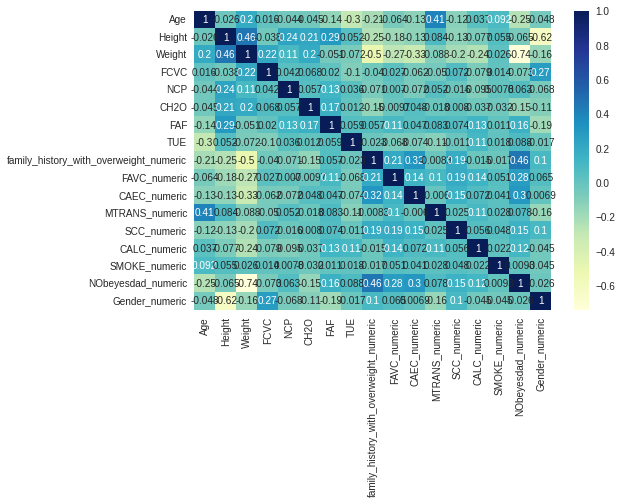

In [ ]:
df_pandas = indexed_df_fix.toPandas()
print(df_pandas.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df_pandas.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assemble = VectorAssembler(inputCols=[
'Height',
'Weight',
'family_history_with_overweight_numeric',
'NObeyesdad_numeric'],outputCol = 'target')

assembled_data=assemble.transform(indexed_df_fix)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='target', \
metricName='silhouette', distanceMeasure='squaredEuclidean')

for K in range(2,11):

    KMeans_=KMeans(featuresCol='target', k=K)

    KMeans_fit=KMeans_.fit(assembled_data)

    KMeans_transform=KMeans_fit.transform(assembled_data) 

    evaluation_score=evaluator.evaluate(KMeans_transform)

    silhouette_scores.append(evaluation_score)

Text(0, 0.5, 'Silhouette Score')

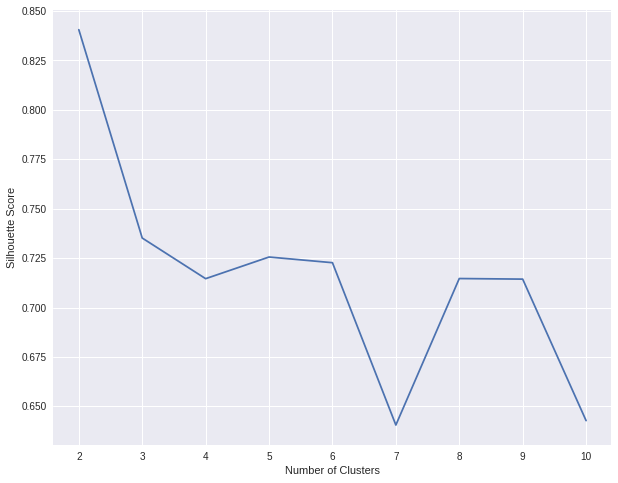

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

In [ ]:
KMeans_=KMeans(featuresCol='target', k=2) 
KMeans_Model=KMeans_.fit(assembled_data)
KMeans_Assignments=KMeans_Model.transform(assembled_data)

In [ ]:
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="target", outputCol="pca")
pca_model = pca.fit(assembled_data)
pca_transformed = pca_model.transform(assembled_data)

In [ ]:
import numpy as np
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())

In [ ]:
cluster_assignment = np.array(KMeans_Assignments.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

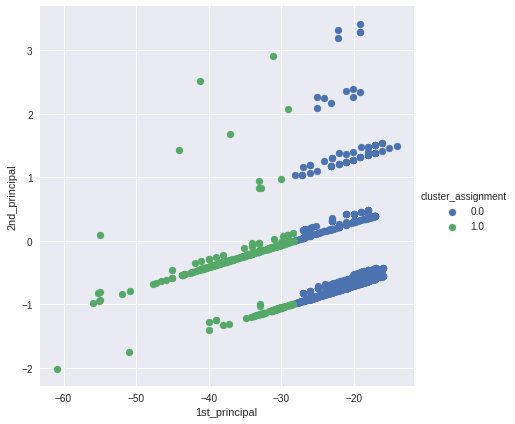

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_data = np.hstack((x_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()

In [ ]:
KMeans_Assignments.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  427|
|         0| 1684|
+----------+-----+



In [ ]:
class_pred = KMeans_Assignments.groupBy('prediction')

In [ ]:
KMeans_Assignments.show()

+----+------+------+----+---+----+---+---+--------------------------------------+------------+------------+--------------+-----------+------------+-------------+------------------+--------------+------------------+----------+
| Age|Height|Weight|FCVC|NCP|CH2O|FAF|TUE|family_history_with_overweight_numeric|FAVC_numeric|CAEC_numeric|MTRANS_numeric|SCC_numeric|CALC_numeric|SMOKE_numeric|NObeyesdad_numeric|Gender_numeric|            target|prediction|
+----+------+------+----+---+----+---+---+--------------------------------------+------------+------------+--------------+-----------+------------+-------------+------------------+--------------+------------------+----------+
|21.0|  1.62|  64.0| 2.0|3.0| 2.0|0.0|1.0|                                   0.0|         1.0|         0.0|           0.0|        0.0|         1.0|          0.0|               5.0|           1.0|    (4,[0],[21.0])|         0|
|21.0|  1.52|  56.0| 3.0|3.0| 3.0|3.0|0.0|                                   0.0|         1.0|  

In [ ]:
df_pandas = KMeans_Assignments.toPandas()
# Importing Pandas to create DataFrame
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
df_pandas_new = pd.DataFrame(df_pandas)
df_pandas_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight_numeric,FAVC_numeric,CAEC_numeric,MTRANS_numeric,SCC_numeric,CALC_numeric,SMOKE_numeric,NObeyesdad_numeric,Gender_numeric,target,prediction
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,"(21.0, 0.0, 0.0, 0.0)",0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,"[21.0, 1.0, 0.0, 0.0]",0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0.0,1.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,"(23.0, 0.0, 0.0, 0.0)",0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,"[27.0, 0.0, 1.0, 2.0]",0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,"[22.0, 0.0, 1.0, 0.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"(20.976842, 0.0, 0.0, 0.0)",0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"(21.982942, 0.0, 0.0, 0.0)",0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"(22.524036, 0.0, 0.0, 0.0)",0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"(24.361936, 0.0, 0.0, 0.0)",0


In [ ]:
for i in range(2):
  print(f'Cluster ke-{i}')
  print('Rata-rata Tinggi: ', df_pandas_new[df_pandas_new['prediction']==i]['Height'].mean())
  print('Rata-rata Berat : ', df_pandas_new[df_pandas_new['prediction']==i]['Weight'].mean())
  print('Rata-rata Family History with Overweight Numeric: ', df_pandas_new[df_pandas_new['prediction']==i]['family_history_with_overweight_numeric'].mean())
  print('Rata-rata NObeyesdad_numeric: ', df_pandas_new[df_pandas_new['prediction']==i]['NObeyesdad_numeric'].mean())
  print()

Cluster ke-0
Rata-rata Tinggi:  1.699509729216152
Rata-rata Berat :  85.12384838420428
Rata-rata Family History with Overweight Numeric:  0.21080760095011877
Rata-rata NObeyesdad_numeric:  2.9780285035629452

Cluster ke-1
Rata-rata Tinggi:  1.7102260163934426
Rata-rata Berat :  92.35271200468384
Rata-rata Family History with Overweight Numeric:  0.0702576112412178
Rata-rata NObeyesdad_numeric:  2.34192037470726

